# Single-cell RNA-seq imputation using DeepImpute

Here is a comprehensive tutorial to understand the functionnalities of DeepImpute.

In [1]:
from deepimpute.multinet import MultiNet
import pandas as pd

# Load dataset using pandas
data = pd.read_csv('examples/test.csv',index_col=0)
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 500 cells and 3000 genes


## Create a DeepImpute multinet

In [2]:
# Using default parameters
multinet = MultiNet() 

In [3]:
# Using custom parameters
NN_params = {'max_epochs': 200,
            'learning_rate': 1e-4,
            'dims': [20,600], # 500 output neurons, 20 highest correlated genes for each output gene
            'batch_size': 64,
            'layers': [{'label': 'dense', 'activation': 'relu', 'nb_neurons': 150},
                       {'label': 'dropout', 'activation': 'dropout', 'rate': 0.15},
                       {'label': 'dense', 'activation': 'relu'}], # Output neurons for layer 3: dims[1]
            'n_cores': 8
            }

multinet = MultiNet(**NN_params)

## Fit the networks

In [4]:
# Using all the data
multinet.fit(data,cell_subset=1)

Gene prediction limit set to 2085 genes
Using 1040 genes as potential predictors
Starting training with 500 cells (100.0%) on 4 threads (2 cores/thread).
Training finished after 101 epochs.
Training finished after 123 epochs.
Training finished after 118 epochs.
Training finished after 160 epochs.


In [5]:
# Using 80% of the data
multinet.fit(data,cell_subset=0.8)

Gene prediction limit set to 2085 genes
Using 1040 genes as potential predictors
Starting training with 400 cells (80.0%) on 4 threads (2 cores/thread).
Training finished after 91 epochs.
Training finished after 91 epochs.
Training finished after 91 epochs.
Training finished after 102 epochs.


In [6]:
# Using 200 cells (randomly selected)
multinet.fit(data,cell_subset=200)

Gene prediction limit set to 2085 genes
Using 1040 genes as potential predictors
Starting training with 200 cells (40.0%) on 4 threads (2 cores/thread).
Training finished after 54 epochs.
Training finished after 55 epochs.
Training finished after 55 epochs.
Training finished after 60 epochs.


In [7]:
# Custom fit
trainingData = data.iloc[100:250,:]
multinet.fit(trainingData)

Gene prediction limit set to 1940 genes
Using 925 genes as potential predictors
Starting training with 150 cells (100.0%) on 4 threads (2 cores/thread).
Training finished after 81 epochs.
Training finished after 81 epochs.
Training finished after 104 epochs.
Training finished after 104 epochs.


## Imputation

The imputation can be done on any dataset as long as the gene labels are the same

In [8]:
imputedData = multinet.predict(data)

Starting prediction
INFO:tensorflow:Restoring parameters from /tmp/run/39c9037d1b/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'cbae57'/Checkpoint-81
INFO:tensorflow:Restoring parameters from /tmp/run/39c9037d1b/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'da268d'/Checkpoint-104
INFO:tensorflow:Restoring parameters from /tmp/run/39c9037d1b/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'94b7b2'/Checkpoint-104
INFO:tensorflow:Restoring parameters from /tmp/run/39c9037d1b/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'68566b'/Checkpoint-81


## Visualization

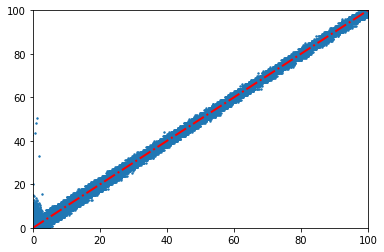

In [9]:
import matplotlib.pyplot as plt
import numpy as np

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()


## Scoring

In [10]:
multinet.score(data)

Starting prediction
INFO:tensorflow:Restoring parameters from /tmp/run/8164bb9ea1/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'd346d8'/Checkpoint-81
INFO:tensorflow:Restoring parameters from /tmp/run/8164bb9ea1/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'ff80d9'/Checkpoint-81
INFO:tensorflow:Restoring parameters from /tmp/run/8164bb9ea1/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'12a652'/Checkpoint-104
INFO:tensorflow:Restoring parameters from /tmp/run/8164bb9ea1/lr=0.0001_bs=64_dims=20-600_nodes=150_dp=0.15_b'b2289a'/Checkpoint-104


0.6051813375162249